<a href="https://colab.research.google.com/github/samjurassic/datascience-demo/blob/main/Kaggle_House_Prices.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [90]:
# Load libraries
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt
import pydotplus

from IPython.display import Image
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, HistGradientBoostingRegressor
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn import tree
from sklearn.tree import export_graphviz
from io import StringIO
from typing import List

In [34]:
train = pd.read_csv("train.csv")

In [35]:
train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [5]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [51]:
train[train.describe().columns].corr().sort_values("SalePrice").index

Index(['KitchenAbvGr', 'EnclosedPorch', 'MSSubClass', 'OverallCond', 'YrSold',
       'LowQualFinSF', 'Id', 'MiscVal', 'BsmtHalfBath', 'BsmtFinSF2',
       '3SsnPorch', 'MoSold', 'PoolArea', 'ScreenPorch', 'BedroomAbvGr',
       'BsmtUnfSF', 'BsmtFullBath', 'LotArea', 'HalfBath', 'OpenPorchSF',
       '2ndFlrSF', 'WoodDeckSF', 'LotFrontage', 'BsmtFinSF1', 'Fireplaces',
       'MasVnrArea', 'GarageYrBlt', 'YearRemodAdd', 'YearBuilt',
       'TotRmsAbvGrd', 'FullBath', '1stFlrSF', 'TotalBsmtSF', 'GarageArea',
       'GarageCars', 'GrLivArea', 'OverallQual', 'SalePrice'],
      dtype='object')

In [20]:
train[["LotArea", "1stFlrSF", "SalePrice"]].corr()

,LotArea,1stFlrSF,SalePrice
LotArea,1.000000,0.299475,0.263843
1stFlrSF,0.299475,1.000000,0.605852
SalePrice,0.263843,0.605852,1.000000


In [55]:
X = train[['GarageArea', 'GarageCars', 'GrLivArea', 'OverallQual']]
y = train["SalePrice"]

clf = DecisionTreeRegressor(max_depth=5, criterion="squared_error")

In [56]:
clf.fit(X, y)
y_pred = clf.predict(X)

print(f"RMSE LOG: {metrics.mean_squared_log_error(y_true=y, y_pred=y_pred)}")

RMSE LOG: 0.03334112398351131


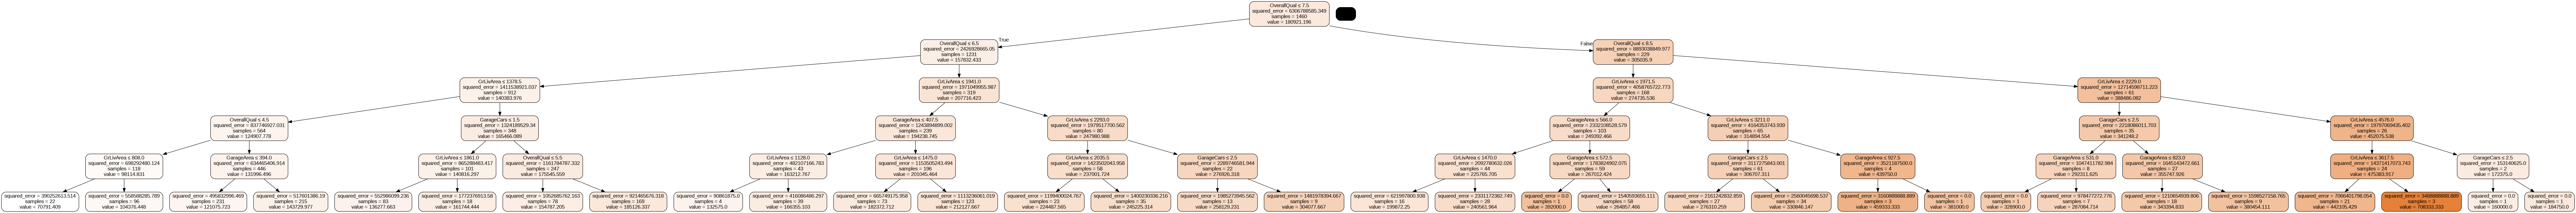

In [57]:
# graph decision tree
dot_data = StringIO()
export_graphviz(clf, out_file=dot_data,
                filled=True, rounded=True,
                special_characters=True,feature_names = X.columns)

graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
graph.write_png('tree.png')
Image(graph.create_png())


In [124]:
model_cols = ['KitchenAbvGr', 'EnclosedPorch', 'MSSubClass', 'OverallCond', 'YrSold',
       'LowQualFinSF', 'Id', 'MiscVal', 'BsmtHalfBath', 'BsmtFinSF2',
       '3SsnPorch', 'MoSold', 'PoolArea', 'ScreenPorch', 'BedroomAbvGr',
       'BsmtUnfSF', 'BsmtFullBath', 'LotArea', 'HalfBath', 'OpenPorchSF',
       '2ndFlrSF', 'WoodDeckSF', 'LotFrontage', 'BsmtFinSF1', 'Fireplaces',
       'MasVnrArea', 'GarageYrBlt', 'YearRemodAdd', 'YearBuilt',
       'TotRmsAbvGrd', 'FullBath', '1stFlrSF', 'TotalBsmtSF', 'GarageArea',
       'GarageCars', 'GrLivArea', 'OverallQual']

# Use train_test_split to split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(
    train[model_cols],
    train["SalePrice"], test_size=0.9, random_state=15)

In [125]:
gb = HistGradientBoostingRegressor(loss="squared_error", learning_rate=0.01, max_depth=2, max_iter=200)
gb.fit(X_train, y_train)

HistGradientBoostingRegressor(learning_rate=0.01, max_depth=2, max_iter=200)

In [126]:
gb_pred = gb.predict(X_test)
print(f"RMSE LOG: {metrics.mean_squared_log_error(y_true=y_test, y_pred=gb_pred)}")

RMSE LOG: 0.05291654965487697


### Make test set predictions and submission file

In [127]:
test = pd.read_csv("test.csv")
test.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


In [128]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1459 non-null   int64  
 1   MSSubClass     1459 non-null   int64  
 2   MSZoning       1455 non-null   object 
 3   LotFrontage    1232 non-null   float64
 4   LotArea        1459 non-null   int64  
 5   Street         1459 non-null   object 
 6   Alley          107 non-null    object 
 7   LotShape       1459 non-null   object 
 8   LandContour    1459 non-null   object 
 9   Utilities      1457 non-null   object 
 10  LotConfig      1459 non-null   object 
 11  LandSlope      1459 non-null   object 
 12  Neighborhood   1459 non-null   object 
 13  Condition1     1459 non-null   object 
 14  Condition2     1459 non-null   object 
 15  BldgType       1459 non-null   object 
 16  HouseStyle     1459 non-null   object 
 17  OverallQual    1459 non-null   int64  
 18  OverallC

In [129]:
test_x = test[model_cols]

test_x[test_x.isna().any(axis=1)]

,KitchenAbvGr,EnclosedPorch,MSSubClass,OverallCond,YrSold,LowQualFinSF,Id,MiscVal,BsmtHalfBath,BsmtFinSF2,...,YearRemodAdd,YearBuilt,TotRmsAbvGrd,FullBath,1stFlrSF,TotalBsmtSF,GarageArea,GarageCars,GrLivArea,OverallQual
6,1,0,20,7,2010,0,1467,500,0.0,0.0,...,2007,1992,6,2,1187,1168.0,420.0,2.0,1187,6
40,1,0,160,5,2010,0,1501,0,0.0,0.0,...,2000,2000,5,2,756,756.0,440.0,2.0,1512,6
41,1,0,160,5,2010,0,1502,0,0.0,0.0,...,2003,2003,4,2,530,530.0,496.0,2.0,1080,7
45,1,0,20,6,2010,0,1506,0,0.0,0.0,...,1967,1967,8,2,1829,1829.0,535.0,2.0,1829,6
47,1,0,50,5,2010,0,1508,0,1.0,46.0,...,1978,1978,7,3,1287,1224.0,678.0,2.0,1891,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1448,2,0,90,5,2006,0,2909,0,0.0,0.0,...,1970,1970,8,2,1652,1652.0,928.0,3.0,1652,5
1449,1,0,180,6,2006,0,2910,0,0.0,0.0,...,1970,1970,3,1,630,630.0,0.0,0.0,630,4
1453,1,0,160,5,2006,0,2914,0,0.0,0.0,...,1970,1970,5,1,546,546.0,0.0,0.0,1092,4
1454,1,0,160,7,2006,0,2915,0,0.0,0.0,...,1970,1970,5,1,546,546.0,0.0,0.0,1092,4


In [116]:
# test_x.describe().T["count"]

In [130]:
y_pred = gb.predict(test_x)

In [131]:
output_df = pd.concat([test["Id"], pd.Series(y_pred).rename("SalePrice")], axis=1)
output_df.to_csv("sam_predictions_gb.csv", index=False)

In [132]:
output_df.head()

,Id,SalePrice
0,1461,140541.991208
1,1462,185144.138164
2,1463,179527.592233
3,1464,172012.107378
4,1465,213905.879968
